# AusPlots Time Series Visualisation

In [26]:
import matplotlib.pyplot as plt
import os 
import pandas as pd 

In [27]:
def plotPredictions(dataset, evaluation_df, TARGET):
    fig, ax = plt.subplots(nrows = 3, figsize = (15,10), sharex = True)
    for i,v in enumerate(TARGET):
        
        if v == 'pv_filter':
            color = 'green'
            on_ground = 'green'
        elif v == 'npv_filter':
            color = 'blue'
            on_ground = 'brown'
        else:
            color = 'red'
            on_ground = 'bare'
        
        ax[i].scatter(evaluation_df['visit_start_date'], evaluation_df[on_ground], label = f'On-site measured {v.split("_")[0]}',
                                   color = 'black', marker =  'x', zorder=10, s = 70)
        dataset[v].plot(ax=ax[i], label = f'Satellite {v.split("_")[0]}', color = color)
       
        ax[i].legend(loc = 'upper left')
        ax[i].grid(True)
        ax[i].set_ylim([0,100])
    plt.show()

In [28]:
site_name = 'QDABBS0005'
site_name = 'NTASTU0004'
site_name = 'WAGCOO0001'
site_name = 'SAAMDD0011'
site_dea_fc = pd.read_csv(f'../DATASETS/DEA_FC_PROCESSED/MODELLED_PREPROCESSED/Input_Dataset_{site_name}.csv', parse_dates = ['time'])
site_dea_fc = site_dea_fc.sort_values('time')
site_dea_fc = site_dea_fc.set_index('time')

In [29]:
evaluation_point = pd.read_csv('../DATASETS/AusPlots_Extracted_Data/Final/DEA_FC_Ground_Truth_Evaluation.csv', parse_dates = ['visit_start_date','time'])
evaluation_point = evaluation_point.set_index('site_location_name')
evaluation_point = evaluation_point.iloc[evaluation_point.index == site_name]

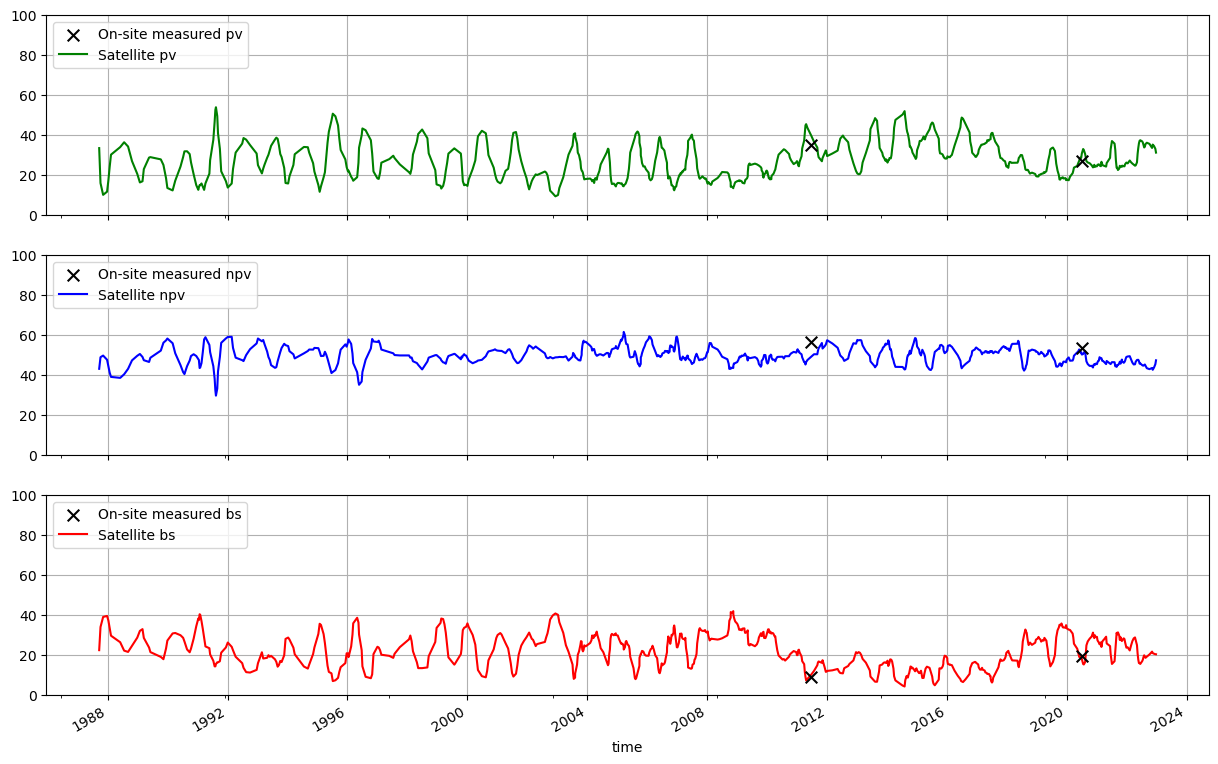

In [30]:
plotPredictions(site_dea_fc, evaluation_point, ['pv_filter', 'npv_filter', 'bs_filter'])

In [31]:
evaluation_point

,Unnamed: 0,site_unique,green,brown,bare,other,error,visit_start_date,time,pv_filter,npv_filter,bs_filter
site_location_name,,,,,,,,,,,,
SAAMDD0011,584,SAAMDD0011-53745,34.8,56.3,8.9,0.0,0,2011-06-21,2011-06-26,39.446414,49.192895,10.210671
SAAMDD0011,585,SAAMDD0011-58828,26.7,53.5,19.6,0.2,0,2020-07-09,2020-07-04,30.661091,50.153515,17.895146
